In [3]:
%load_ext autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
%autoreload 2

import sys,os,glob
import matplotlib
import matplotlib.pyplot as plt
import sparse
import xarray as xr
import numpy as np
import pandas as pd
from pprint import pprint

import netCDF4
import matplotlib.animation as animation
import imageio
import math
from IPython.display import Video
from tqdm import tqdm

In [5]:
path_DYAMOND_REGIONS = '/data/bfildier/DYAMOND_REGIONS/'

print("files in DYAMOND_REGIONS directory:")
for filename in os.listdir(path_DYAMOND_REGIONS):
    print("     "+filename)

files in DYAMOND_REGIONS directory:
     205E_250E_0N_20N
     130E_165E_0N_20N
     310E_340E_0N_20N


#### 130E_165E_0N_20N SAM 2D data

In [6]:
path_reg1_SAM = os.path.join(path_DYAMOND_REGIONS, "130E_165E_0N_20N/SAM")

path_2D = os.path.join(path_reg1_SAM,'2D')
print(f"path: {path_2D}")

# # print all file names:
# for filename in os.listdir(path_2D):
#     print(filename)

path: /data/bfildier/DYAMOND_REGIONS/130E_165E_0N_20N/SAM/2D


#### example data file on precipitable water

In [7]:
path_file = os.path.join(path_2D,'DYAMOND_9216x4608x74_7.5s_4km_4608_0000313680.PW.2D.nc')
data_2D_dy_ex = xr.open_dataset(path_file)

In [8]:
# Open the NetCDF file
file_path = path_file
dataset = netCDF4.Dataset(file_path)

# Print variable names
print(dataset.variables)
print("-------------------------------------")

# Print dimensions
print(dataset.dimensions)
print("-------------------------------------")

# Print a subset of data values
variable_data = dataset.variables['PW'][:]
print(variable_data)

<ipython-input-8-cf97cb2763f8>:6: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(dataset.variables)
<ipython-input-8-cf97cb2763f8>:10: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(dataset.dimensions)


{'PW': <class 'netCDF4._netCDF4.Variable'>
float32 PW(time, lat, lon)
    long_name: Precipitable Water
    units: kg/m2
unlimited dimensions: time
current shape = (1, 518, 896)
filling on, default _FillValue of 9.969209968386869e+36 used, 'lat': <class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    units: degrees_north
unlimited dimensions: 
current shape = (518,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'lon': <class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    units: degrees_east
unlimited dimensions: 
current shape = (896,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'time': <class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    units: day
    long_name: time
unlimited dimensions: time
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used}
-------------------------------------
{'time': <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 1, 'lat': <class 'netCDF4._netCDF4.Dimension'>: 

<ipython-input-8-cf97cb2763f8>:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  variable_data = dataset.variables['PW'][:]


# <p style="color:pink">Task 1</p>
1. Pick a time step ✅
2. Plot map of variable ✅

In [13]:
i_t = 0 # time step index
variable = "PW" # PW = Precipitable Water

* getting all files of desired variable
* sorting files by time stamp
* indexing to desired time stamp file

In [14]:
# Search for files containing the desired characters
matching_files = glob.glob(path_2D + '/*{}*'.format(variable))
sorted_files = sorted(matching_files)
file = sorted_files[i_t]
dataset = netCDF4.Dataset(file)
print("file name: ", file)
print("shape: ", dataset.variables[variable].shape)
print("dimensions: ", dataset.dimensions)

## getting time stamp
start_marker = "DYAMOND_9216x4608x74_7.5s_4km_4608_"
end_marker = ".PW.2D.nc"

start_index = file.index(start_marker) + len(start_marker)
end_index = file.index(end_marker)

time_stamp = file[start_index:end_index]
time_stamp_filename = start_marker+time_stamp+end_marker

file name:  /data/bfildier/DYAMOND_REGIONS/130E_165E_0N_20N/SAM/2D/DYAMOND_9216x4608x74_7.5s_4km_4608_0000200160.PW.2D.nc
shape:  (1, 518, 896)
dimensions:  {'time': <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 1, 'lat': <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 518, 'lon': <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 896}


<ipython-input-14-26f2b098b1d4>:8: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print("dimensions: ", dataset.dimensions)


* PW(time, lat, lon)

<ipython-input-16-998e14c908f7>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  variable_data = dataset.variables[variable][:]
<ipython-input-16-998e14c908f7>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = dataset.variables['lon'][:]
<ipython-input-16-998e14c908f7>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `boo

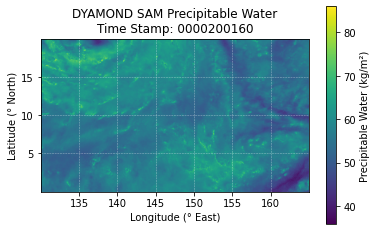

In [16]:
variable_data = dataset.variables[variable][:]
# Get the lon and lat values
lon = dataset.variables['lon'][:]
lat = dataset.variables['lat'][:]

# Plot the variable
fig, ax = plt.subplots()
plt.imshow(variable_data[0, :, :], origin='lower', extent=[lon.min(), lon.max(), lat.min(), lat.max()])
plt.xlabel('Longitude (° East)')
plt.ylabel('Latitude (° North)')
plt.title(f'DYAMOND SAM Precipitable Water\nTime Stamp: {time_stamp}')
ax.grid(True, linestyle='--', linewidth=0.5, color='white', alpha=0.5)
cbar = plt.colorbar(label='Precipitable Water (kg/m²)')

# Show the plot
plt.show()
%matplotlib inline

# <p style="color:pink">Task 2</p>
1. Find the spatial mean of a variable ✅
2. Plot a time series of the variable ✅

In [29]:
## continuing with PW, timestamp 0

# Open the NetCDF file
data = xr.open_dataset(file)

# Select the variable of interest
variable = data["PW"]

# Calculate the spatial mean in independent coordinates
mean_lon = variable.mean(dim='lon')
mean_lat = variable.mean(dim='lat')

# # Print the spatial means
# print(mean_lon)
# print(mean_lat)

# Calculate the spatial mean in both x and y dimensions
mean_lonlat = variable.mean(dim=['lon', 'lat'])

# Print the spatial mean
print("spatial mean:", mean_lonlat.item(), "kg/m²")

spatial mean: 53.82204818725586 kg/m²


In [30]:
# sorted_files has all of the time step files of PW
x = len(sorted_files)
data_list = [] 
timestamp_list = []

In [31]:
# Iterate through the timestamps and populate the array
for i, file in enumerate(sorted_files):
    data = xr.open_dataset(file)
    variable = data["PW"]
    mean_lonlat = variable.mean(dim=['lon', 'lat'])
    mean_lonlat_value = mean_lonlat.values[0]
    
    ## getting time stamp
    start_marker = "DYAMOND_9216x4608x74_7.5s_4km_4608_"
    end_marker = ".PW.2D.nc"

    start_index = file.index(start_marker) + len(start_marker)
    end_index = file.index(end_marker)

    time_stamp = file[start_index:end_index]
    
    data_list.append(mean_lonlat_value)
    timestamp_list.append(time_stamp)
    
PW_means_lonlat_array = np.array(data_list)
timestamps_array = np.array(timestamp_list)
# Print the resulting array

print(PW_means_lonlat_array)
print(timestamps_array)

[57.22739  57.210747 57.178886 ... 45.415672 45.413242 45.418385]
['0000200160' '0000200400' '0000200640' ... '0000460320' '0000460560'
 '0000460800']


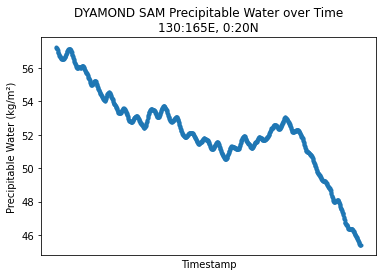

In [32]:
## plotting

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the data
ax.plot(timestamps_array, PW_means_lonlat_array, marker='.', linestyle='none')
ax.set_xlabel('Timestamp')
ax.set_ylabel('Precipitable Water (kg/m²)')
ax.set_title('DYAMOND SAM Precipitable Water over Time\n130:165E, 0:20N')


plt.xticks([])

plt.show()

# <p style="color:pink">Task 3 (ind.)</p>

1. Plot other variables
2. Identify extremes
    1. 99th percentile
    
    
    
first focus on precac
--> can use given functions

extremes:
need to load all the data
frequency of points above extreme over time

--> with respect to all data(our data in context with entire dataset) 
1. looking at one timestep
2. looking at all timesteps
*3. focusing on one timestep and seeing how it evolves with time (focus on this one)

other definition: looking at single timestep for spatial extreme and seeing how it evolves with time

daily window average can help isolate the diurnal cycle: "running mean with daily window" np.convolve (convolution)
can do this for all variables and see if they follow different trends

In [33]:
def find_file_with_string(file_list, search_string, start_index, end_index):
    for index, file_name in enumerate(file_list):
        if start_index <= len(file_name) >= end_index and search_string in file_name[start_index:end_index]:
            return index
    
    # Return -1 if the file is not found
    return -1

### Example:

# List of files
file_list = sorted_files

# Search parameters
search_string = "0000200160"
start_index = 119
end_index = 129

# Find the file containing the string
file_index = find_file_with_string(file_list, search_string, start_index, end_index)
print(file_index)
###

-1


In [31]:
def get_timestamps(file_list, start_index, end_index):
    found_strings = []
    for file_name in file_list:
        string_found = file_name[start_index:end_index]
        if len(string_found) == (end_index - start_index):
            found_strings.append(string_found)
    return found_strings

In [32]:
def plot_singletime_var(variable: str, timestamp: str):
    # Search for files containing the desired characters
    matching_files = glob.glob(path_2D + '/*{}*'.format(variable))
    sorted_files = sorted(matching_files)
    i_t = find_file_with_string(sorted_files, timestamp, 119, 129) # finds index in list of files (119:129 are character indices for time stamp)
    
    file = sorted_files[i_t]
    dataset = netCDF4.Dataset(file)
   

    # getting data
    variable_data = dataset.variables[variable][:]
    # Get the lon and lat values
    lon = dataset.variables['lon'][:]
    lat = dataset.variables['lat'][:]
    
    # Plot the variable
    fig, ax = plt.subplots()
    plt.imshow(variable_data[0, :, :], origin='lower', extent=[lon.min(), lon.max(), lat.min(), lat.max()])
    plt.xlabel('Longitude (° East)')
    plt.ylabel('Latitude (° North)')
    plt.title(f'DYAMOND SAM Precipitable Water\nTime Stamp: {timestamp}')
    ax.grid(True, linestyle='--', linewidth=0.5, color='white', alpha=0.5)
    cbar = plt.colorbar(label='Precipitable Water (kg/m²)')

    # Show the plot
    plt.show()
    %matplotlib inline

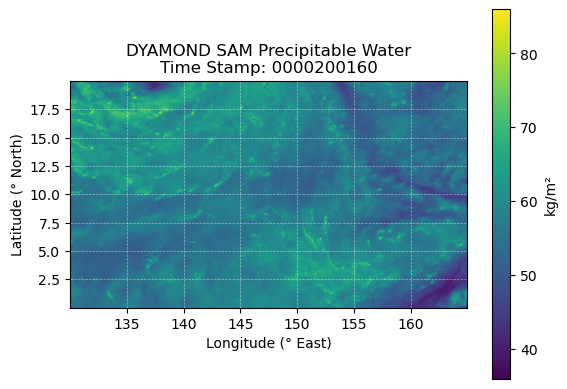

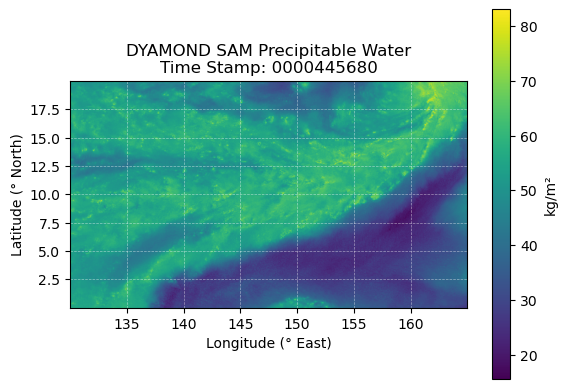

In [261]:
plot_singletime_var("PW", "0000200160")
plot_singletime_var("PW", "0000445680")

## animation of all timesteps:

In [50]:
def anim_singletime_var(variable: str, timestamps: list = None, desired_duration: int = 20, video_path: str = 'output_video.mp4'):
    # Search for files containing the desired characters
    matching_files = glob.glob(path_2D + '/*{}*'.format(variable))
    sorted_files = sorted(matching_files)

    # Use all available timestamps if none are provided
    if timestamps is None:
        timestamps = get_timestamps(sorted_files, 119, 129)

    # Get the overall minimum and maximum values of variable_data
    min_value = float('inf')
    max_value = float('-inf')

    # Calculate the overall minimum and maximum values
    for timestamp in timestamps:
        i_t = find_file_with_string(sorted_files, timestamp, 119, 129)
        file = sorted_files[i_t]
        dataset = netCDF4.Dataset(file)

        variable_data = dataset.variables[variable][:]
        min_value = min(min_value, variable_data.min())
        max_value = max(max_value, variable_data.max())

    # Create a list to store the frames for the video
    frames = []

    # Generate plots for each timestamp with a progress bar
    with tqdm(total=len(timestamps), desc='Generating Frames') as pbar:
        for timestamp in timestamps:
            i_t = find_file_with_string(sorted_files, timestamp, 119, 129)
            file = sorted_files[i_t]
            dataset = netCDF4.Dataset(file)

            # Getting data
            variable_data = dataset.variables[variable][:]
            # Get the lon and lat values
            lon = dataset.variables['lon'][:]
            lat = dataset.variables['lat'][:]

            # Plot the variable
            fig, ax = plt.subplots()
            img = ax.imshow(variable_data[0, :, :], origin='lower', extent=[lon.min(), lon.max(), lat.min(), lat.max()])
            plt.xlabel('Longitude (° East)')
            plt.ylabel('Latitude (° North)')
            plt.title(f'DYAMOND SAM Precipitable Water\nTime Stamp: {timestamp}')
            ax.grid(True, linestyle='--', linewidth=0.5, color='white', alpha=0.5)
            cbar = plt.colorbar(img, label='Precipitable Water (kg/m²)')

            # Set consistent colorbar limits
            img.set_clim(min_value, max_value)

            # Convert the plot to an image frame
            fig.canvas.draw()
            frame = np.array(fig.canvas.renderer._renderer)
            frames.append(frame)

            plt.close(fig)

            # Update the progress bar
            pbar.set_postfix({'Timestamp': timestamp})
            pbar.update(1)

    # Calculate the desired fps based on the desired duration
    num_frames = len(frames)
    fps = math.ceil(num_frames / desired_duration)

    # Save the frames as a video with the desired fps
    imageio.mimsave(video_path, frames, fps=fps)

    print(f'Video saved to: {video_path}')


In [51]:
anim_singletime_var(variable="PW", video_path="PW_t1.mp4")

Generating Frames: 100%|█████████████████████████████████████████████████████████████████| 1087/1087 [07:03<00:00,  2.57it/s, Timestamp=0000460800]


Video saved to: test6.mp4


In [53]:
video_path = 'PW_t1.mp4'
Video(video_path)